# **CartoCell - Training workflow (Phases 2 and 4) -** <font color='red'><b>Deprecated</b></font>
___  
  
**CartoCell** is a deep learning-based image processing pipeline for the high-throughput segmentation of whole epithelial cysts acquired at low resolution with minimal human intervention. The official documentation of the workflow is in [BiaPy's CartoCell tutorial](https://biapy.readthedocs.io/en/latest/tutorials/instance_seg/cartocell.html).

<figure>
<center>
<img src='https://raw.githubusercontent.com/BiaPyX/BiaPy-doc/refs/heads/master/source/img/cartocell_pipeline.png' width='800px'/>
<figcaption><b>Figure 1</b>: CartoCell processing phases (from Andrés-San Román et al., 2022).</figcaption></center>
</figure>


**This notebook replicates CartoCell's Phase 2**, i.e., it allows the segmentation of 3D epithelial cysts by training a deep learning model on a small dataset of low-resolution images (see Figure 1, Phase 2, model M1), but it is also the same workflow applied for the full dataset training (Figure 1, Phase 4, model M2).

___


**CartoCell** relies on the [BiaPy library](https://github.com/BiaPyX/BiaPy), freely available in GitHub: https://github.com/BiaPyX/BiaPy

Please note that **CartoCell** is based on a publication. If you use it successfully for your research please be so kind to cite our work:

*Andres-San Roman, J.A., Gordillo-Vazquez, C., Franco-Barranco, D., Morato, L., Fernandez-Espartero, C.H., Baonza, G., Tagua, A., Vicente-Munuera, P., Palacios, A.M., Gavilán, M.P., Martín-Belmonte, F., Annese, V., Gómez-Gálvez, P., Arganda-Carreras, I., Escudero, L.M. [CartoCell, a high-content pipeline for 3D image analysis, unveils cell morphology patterns in epithelia](https://www.cell.com/cell-reports-methods/fulltext/S2667-2375(23)00249-7). Cell Reports Methods, 3(10).*


___

<font color='red'><b>WARNING:</b></font> This notebook is **deprecated**, since we don’t have control over the versions of the packages installed in Google Colab and there is no way to install the required version of BiaPy through pip (that option was created after the publication of CartoCell).

## **Expected inputs and outputs**
___
**Inputs**

This notebook expects five folders as input:
* **Training raw images**: with the raw 3D TIFF images to train the model. A cyst per image is expected.
* **Training label images**: with the label 3D TIFF images (annotated cell instances) to train the model. Their names and sizes must match those of the training raw images.
* **Validation raw images**: with the raw 3D TIFF images to validate the model. A cyst per image is expected.
* **Validation label images**: with the label 3D TIFF images (annotated cell instances) to validate the model. Their names and sizes must match those of the validation raw images.
* **Output folder**: a path to store the segmentation results.

**Outputs**

If the execution is successful, two folders will be created **for each input validation image** containing:
* A **TIFF image** with the cell instances before 3D Voronoi post-processing.
* A **TIFF image** with the cell instances after 3D Voronoi post-processing.



<figure>
<center>
<img src='https://biapy.readthedocs.io/en/latest/_images/cyst_sample.gif' width='300'/>
<img src='https://biapy.readthedocs.io/en/latest/_images/cyst_instance_prediction.gif' width='300'/>
<figcaption><b>Figure 2</b>: Example of input and output images. From left to rigth: 3D TIFF input image and the resulting TIFF image with the cell instances after Voronoi post-processing</figcaption></center>
</figure>


<font color='red'><b>Note</b></font>: for testing purposes, you can also run this notebook with the samples images provided in *Manage file(s) source > Option 3*. Those samples are the ones used in our [publication](https://www.cell.com/cell-reports-methods/fulltext/S2667-2375(23)00249-7).






## **Prepare the environment**
___

Establish connection with Google services. You **must be logged in to Google** to continue.
Since this is not Google's own code, you will probably see a message warning you of the dangers of running unfamiliar code. This is completely normal.


## **Manage file(s) source**
---
The input folder can be provided using three different options: by directly uploading the folder (option 1), by using a folder stored in Google Drive (option 2) or by using a few samples of our data (option 3).

Depending on the option chosen, different steps will have to be taken, as explained in the following cells.


### **Option 1: use your local files and upload them to the notebook**
---
You will be prompted to upload your files to Colab and they will be stored under `/content/input/`.

In [ ]:
#@markdown ##Play the cell to upload local files (train raw images)
#@markdown If you don't have your own data, you can use our [training down-sampled raw images](https://drive.google.com/file/d/1fpsqlebyaFTGFMp2shh6lRtPsjKGYPzl/view?usp=sharing) here (from the M1 training set in our [publication](https://www.cell.com/cell-reports-methods/fulltext/S2667-2375(23)00249-7)).
from google.colab import files
!mkdir -p /content/input/train/x
%cd /content/input/train/x
uploaded = files.upload()
%cd /content

In [ ]:
#@markdown ##Play the cell to upload local files (train label images)
#@markdown If you don't have your own data, you can use our [training down-sampled label images](https://drive.google.com/file/d/1BiRp_el24BgiVmJkcEDAlZxzha_22Cp3/view?usp=share_link) here (from the M1 training set in our [publication](https://www.cell.com/cell-reports-methods/fulltext/S2667-2375(23)00249-7)).

from google.colab import files
!mkdir -p /content/input/train/y
%cd /content/input/train/y
uploaded = files.upload()
%cd /content

In [ ]:
#@markdown ##Play the cell to upload local files (validation raw images)
#@markdown If you don't have your own data, you can use our [validation dataset raw images](https://drive.google.com/file/d/1RQUpMDL-kjtqgtBdenW4-MbGEfF5Bf6M/view?usp=share_link) here.

from google.colab import files
!mkdir -p /content/input/val/x
%cd /content/input/val/x
uploaded = files.upload()
%cd /content

In [ ]:
#@markdown ##Play the cell to upload local files (validation label images)
#@markdown If you don't have your own data, you can use our [validation dataset label images](https://drive.google.com/file/d/1fR23V-3ik0Phva50V33TeAi5U1l9YlAu/view?usp=share_link) here.

from google.colab import files
!mkdir -p /content/input/val/y
%cd /content/input/val/y
uploaded = files.upload()
%cd /content

### **Option 2: mount your Google Drive**
---
To use this notebook on your own data from Google Drive, you need to mount Google Drive first.

Play the cell below to mount your Google Drive and follow the link that will be shown. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive.

Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL.

#@markdown * Sign in your Google Account.

#@markdown * Copy the authorization code.

#@markdown * Enter the authorization code.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Option 3: download a few of our samples**
---
If you do not have data at hand but would like to test the notebook, no worries! You can run the following cell to download a subset of our cyst samples and continue with rest of the notebook. They correspond to the **training and validation sets used to train the M1 model** in our manuscript and publicly available in [Zenodo](https://zenodo.org/records/10973241).

In [ ]:
#@markdown ##Play to download our data samples (M1 training and validation sets)

import os

fnamex = "/content/train_M1_x.zip" # https://drive.google.com/file/d/1fpsqlebyaFTGFMp2shh6lRtPsjKGYPzl/view?usp=sharing
fnamey = "/content/train_M1_y.zip" # https://drive.google.com/file/d/1BiRp_el24BgiVmJkcEDAlZxzha_22Cp3/view?usp=share_link
fnamevx = "/content/val_x.zip" # https://drive.google.com/file/d/1RQUpMDL-kjtqgtBdenW4-MbGEfF5Bf6M/view?usp=share_link
fnamevy = "/content/val_y.zip" # https://drive.google.com/file/d/1fR23V-3ik0Phva50V33TeAi5U1l9YlAu/view?usp=share_link

!mkdir -p /content/input/train
!mkdir -p /content/input/val

%cd /content
if not os.path.exists(fnamex) or  not os.path.exists(fnamey):
    !pip install --upgrade --no-cache-dir gdown &> /dev/null
    !gdown --id 1fpsqlebyaFTGFMp2shh6lRtPsjKGYPzl &> /dev/null
    !gdown --id 1BiRp_el24BgiVmJkcEDAlZxzha_22Cp3 &> /dev/null
    !gdown --id 1RQUpMDL-kjtqgtBdenW4-MbGEfF5Bf6M &> /dev/null
    !gdown --id 1fR23V-3ik0Phva50V33TeAi5U1l9YlAu &> /dev/null
    %cd /content/input/train
    !unzip {fnamex} &> /dev/null
    !unzip {fnamey} &> /dev/null
    %cd /content/input/val
    !unzip {fnamevx} &> /dev/null
    !unzip {fnamevy} &> /dev/null
print( 'Dataset downloaded and unzipped under /content/input')
%cd /content



/content
/content/input/train
/content/input/val
Dataset downloaded and unzipped under /content/input
/content



## **Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

Go to **Runtime -> Change the Runtime type**

**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

**Accelerator: GPU** *(Graphics processing unit)*

## **Paths to load input images and save output files**
___

If option 1 (uploading the folder) or option 3 (downloading our prepared data samples) were chosen, define `train_data_path` as '/content/input/train/x', `train_data_mask_path` as '/content/input/train/y', `val_data_path` as '/content/input/val/x', `val_data_mask_path` as '/content/input/val/y', and `output_path` as '/content/out'. Please make sure you download the results from the '/content/out' folder later!

If option 2 is chosen, introduce here the paths to your input files and to the folder where you want to store the results. E.g. '/content/gdrive/MyDrive/...'.

In case you have troubles finding the path to your folders, at the top left of this notebook you will find a small folder icon. Explore until you find the folders. There you can copy the folder path by right clicking and clicking "copy".

In [ ]:
#@markdown #####Path to train images
train_data_path = '/content/input/train/x' #@param {type:"string"}
#@markdown #####Path to train instances
train_data_mask_path = '/content/input/train/y' #@param {type:"string"}
#@markdown #####Path to validation images
val_data_path = '/content/input/val/x' #@param {type:"string"}
#@markdown #####Path to validation instances
val_data_mask_path = '/content/input/val/y' #@param {type:"string"}
#@markdown #####Path to store the resulting images (it'll be created if not existing):
output_path = '/content/output' #@param {type:"string"}

## **Install BiaPy library**
Now we will install **BiaPy**, the library on which **CartoCell** is based. In particular, we will install the version of **BiaPy** associated with the publication of the [CartoCell manuscript](https://www.cell.com/cell-reports-methods/fulltext/S2667-2375(23)00249-7), therefore ensuring reproducibility of the published results.

In [ ]:
#@markdown ##Play to install BiaPy and its dependences

import os
import sys
import numpy as np
from tqdm.notebook import tqdm
from skimage.io import imread
from skimage.exposure import match_histograms

# Clone the repo
%cd /content/
if not os.path.exists('BiaPy'):
    !git clone https://github.com/danifranco/BiaPy.git
    !git checkout d33a9727a698ba3d814ce3bed7d533063cb2ecd1
    !pip install --upgrade --no-cache-dir gdown &> /dev/null
    sys.path.insert(0, 'BiaPy')
    %cd /content/BiaPy

    # update the code so it works the current version of Tensorflow
    !sed -i 's/IoU_instances(t=0.5/IoU_instances(t=0/g' /content/BiaPy/engine/metrics.py

    # Install dependencies
    !pip install git+https://github.com/aleju/imgaug.git &> /dev/null
    !pip install numpy_indexed yacs fill_voids &> /dev/null

/content
Cloning into 'BiaPy'...
remote: Enumerating objects: 15909, done.
remote: Counting objects: 100% (1978/1978), done.
remote: Compressing objects: 100% (671/671), done.
remote: Total 15909 (delta 1391), reused 1869 (delta 1287), pack-reused 13931
Receiving objects: 100% (15909/15909), 824.84 MiB | 26.08 MiB/s, done.
Resolving deltas: 100% (8660/8660), done.
fatal: not a git repository (or any of the parent directories): .git
/content/BiaPy


## **Train the model (Phase 2 / 4)**
Next, we will train the model using all the training samples and will stop if the results are improving on the set-aside validation samples.

This step corresponds to **Phase 2** in the publication if the training samples are those of the **M1 model**, and to **Phase 4** if the training samples are those of the **M2 model**.


In [ ]:
#@markdown ##Play to download the YAML configuration file and update it to train the model
import errno

os.chdir('/content/')

job_name = "cartocell_training"

# remove template file it is exists
template_file = '{}.yaml'.format(job_name)
if os.path.exists( template_file ):
    os.remove( template_file )

# Download template file
!wget https://raw.githubusercontent.com/danifranco/BiaPy/master/templates/instance_segmentation/CartoCell_paper/cartocell_training.yaml &> /dev/null

# Check folders before modifying the .yaml file
if not os.path.exists(train_data_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), train_data_path)
ids = sorted(next(os.walk(train_data_path))[2])
if len(ids) == 0:
    raise ValueError("No images found in dir {}".format(train_data_path))
if not os.path.exists(train_data_mask_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), train_data_mask_path)
ids = sorted(next(os.walk(train_data_mask_path))[2])
if len(ids) == 0:
    raise ValueError("No images found in dir {}".format(train_data_mask_path))

# Check folders before modifying the .yaml file
if not os.path.exists(val_data_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), val_data_path)
ids = sorted(next(os.walk(val_data_path))[2])
if len(ids) == 0:
    raise ValueError("No images found in dir {}".format(val_data_path))
if not os.path.exists(val_data_mask_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), val_data_mask_path)
ids = sorted(next(os.walk(val_data_mask_path))[2])
if len(ids) == 0:
    raise ValueError("No images found in dir {}".format(val_data_mask_path))

# open template configuration file
import yaml
with open( template_file, 'r') as stream:
    try:
        biapy_config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

# update paths to data
biapy_config['DATA']['TRAIN']['PATH'] = train_data_path
biapy_config['DATA']['TRAIN']['MASK_PATH'] = train_data_mask_path
biapy_config['DATA']['VAL']['PATH'] = val_data_path
biapy_config['DATA']['VAL']['MASK_PATH'] = val_data_mask_path
biapy_config['DATA']['TEST']['PATH'] = val_data_path
biapy_config['DATA']['TEST']['MASK_PATH'] = val_data_mask_path

biapy_config['TEST']['ENABLE'] = True
biapy_config['DATA']['TEST']['LOAD_GT'] = True

# Accelerate the process
biapy_config['TRAIN']['EPOCHS'] = 50
biapy_config['TRAIN']['PATIENCE'] = 15
biapy_config['TRAIN']['BATCH_SIZE'] = 4

# save file
with open( template_file, 'w') as outfile:
    yaml.dump(biapy_config, outfile, default_flow_style=False)

print( "Training configuration finished.")

Training configuration finished.


In [ ]:
#@markdown ##Play to train the model
#@markdown We set 50 epochs and 15 of patience to train here due to Colab restrictions but the original was trained setting epochs to 1300 (100 of patience).

import os
import errno

# Run the code
%cd '/content/BiaPy'
!python -u main.py --config '/content/'{job_name}'.yaml' --result_dir {output_path} --name {job_name} --run_id 1 --gpu 0



/content/BiaPy
2023-02-14 10:50:46.914022: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 10:50:47.993086: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-14 10:50:47.993188: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-14 10:50:47.993212: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc

## Inspection of the loss function and the Intersection over Union (IoU)
---

First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

The **Jaccard index or Intersection over Union** (IoU) metric is a method that can be used to quantify the overlap between the target mask and your prediction output. **Therefore, the closer to 1, the better the performance.** This metric can be used to assess the quality of your model to accurately predict cells.

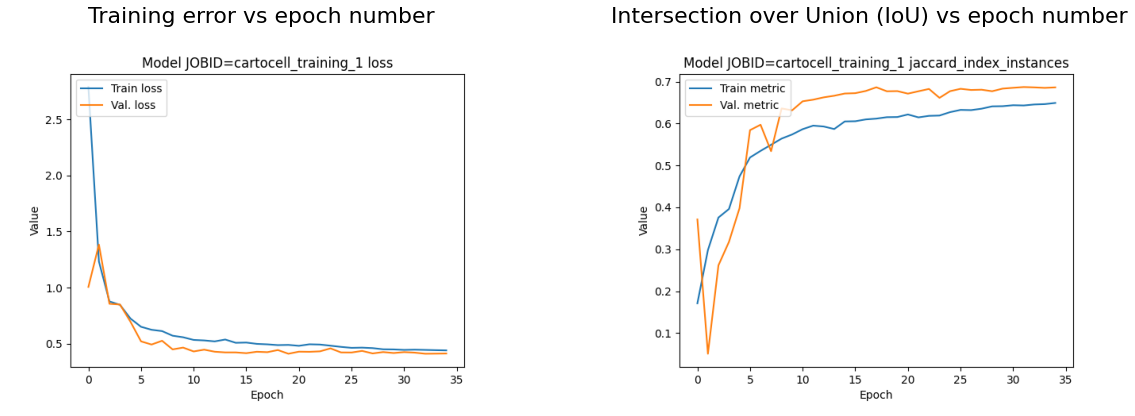

In [ ]:
#@markdown ##Play the cell to show a plot of training error vs. epoch number and IoU vs epoch number
import matplotlib.pyplot as plt

loss_plot = imread( output_path + '/cartocell_training/results/cartocell_training_1/charts/cartocell_training_1_loss.png' )
iou_plot = imread( output_path + '/cartocell_training/results/cartocell_training_1/charts/cartocell_training_1_jaccard_index_instances.png' )

fig = plt.figure( figsize = (20,10))
ax1 = plt.subplot( 1, 2, 1 )
_ = plt.imshow( loss_plot )
_ = plt.axis('off')
ax1.set_title( 'Training error vs epoch number', fontdict = {'fontsize':22})

ax2 = plt.subplot( 1, 2, 2 )
_ = plt.imshow( iou_plot )
_ = plt.axis('off')
_= ax2.set_title( 'Intersection over Union (IoU) vs epoch number', fontdict = {'fontsize':22})

## **Visualize instance segmentation results (from the validation set)**
---

In [ ]:
#@markdown ###Play to visualize results from the validation set

#@markdown The current model will be applied to some validation images and results will be shown as browsable 2D stacks displaying:
#@markdown 1. The **Source image**.
#@markdown 2. Its corresponding **Ground truth** labels.
#@markdown 3. The **3D segmentation** labels **before** post-processing.
#@markdown 4. The **3D segmentation** labels after **Voronoi** post-processing.

%matplotlib inline
import matplotlib
import numpy as np
from numpy.random import randint, seed
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed
import ipywidgets as widgets
from google.colab import output
output.enable_custom_widget_manager()

final_results = os.path.join(output_path, job_name, 'results', job_name+"_1")
instance_results = os.path.join(final_results, "per_image_instances")
instance_post_results = os.path.join(final_results, "per_image_post_processing")

# Show a few examples to check that they have been stored correctly
ids_pred = sorted(next(os.walk(instance_results))[2])
ids_input = sorted(next(os.walk(val_data_path))[2])
ids_gt = sorted(next(os.walk(val_data_mask_path))[2])

# create random color map
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.gist_rainbow(vals))
cmap.colors[0] = [0., 0., 0., 1.] # set background to black

samples_to_show = min(len(ids_input), 3)
chosen_images = np.random.choice(len(ids_input), samples_to_show, replace=False)
seed(1)

test_samples = []
test_sample_preds = []
test_sample_preds_post = []
test_sample_gt = []

# read 3D images again
for i in range(len(chosen_images)):
    aux = imread(os.path.join(val_data_path, ids_input[chosen_images[i]]))
    test_samples.append(aux)

    aux = imread(os.path.join(instance_results, ids_pred[chosen_images[i]])).astype(np.uint16)
    test_sample_preds.append(aux)

    aux = imread(os.path.join(instance_post_results, ids_pred[chosen_images[i]])).astype(np.uint16)
    test_sample_preds_post.append(aux)

    aux = imread(os.path.join(val_data_mask_path, ids_gt[chosen_images[i]])).astype(np.uint16)
    test_sample_gt.append(aux)

# function to show results in 3D within a widget
def scroll_in_z(z, j):

    plt.figure(figsize=(25,5))
    # Source
    plt.subplot(1,4,1)
    plt.axis('off')
    plt.imshow(test_samples[j][z-1], cmap='gray')
    plt.title('Source (z = ' + str(z) + ')', fontsize=15)

    # Target (Ground-truth)
    plt.subplot(1,4,2)
    plt.axis('off')
    plt.imshow(test_sample_gt[j][z-1], cmap=cmap, interpolation='nearest')
    plt.title('Ground truth (z = ' + str(z) + ')', fontsize=15)

    # Prediction
    plt.subplot(1,4,3)
    plt.axis('off')
    plt.imshow(test_sample_preds[j][z-1], cmap=cmap, interpolation='nearest')
    plt.title('3D segmentation (z = ' + str(z) + ')', fontsize=15)

    # Voronoi
    plt.subplot(1,4,4)
    plt.axis('off')
    plt.imshow(test_sample_preds_post[j][z-1], cmap=cmap, interpolation='nearest')
    plt.title('3D segmentation with Voronoi (z = ' + str(z) + ')', fontsize=15)

for j in range(samples_to_show):
    interact(scroll_in_z, z=widgets.IntSlider(min=1, max=test_sample_gt[j].shape[0], step=1, value=test_sample_gt[j].shape[0]//2), j=fixed(j))

interactive(children=(IntSlider(value=25, description='z', max=51, min=1), Output()), _dom_classes=('widget-in…

interactive(children=(IntSlider(value=22, description='z', max=44, min=1), Output()), _dom_classes=('widget-in…

In [ ]:
#@markdown ###Play to display the path to the output files (one 3D TIFF label image for each input image).

final_results = os.path.join(output_path, job_name, 'results', job_name+"_1")

instance_results = os.path.join(final_results, "per_image_instances")
voronoi_results = os.path.join(final_results, "per_image_instances_voronoi")

peak_dir = os.path.join(output_path, str(job_name)+'/results/'+str(job_name)+'_1/per_image_local_max_check')
print("Output paths:")
print("    Instance segmentation files before Voronoi post-processing are in {}".format(instance_results))
print("    Instance segmentation files after Voronoi post-processing are in {}".format(voronoi_results))

Output paths:
    Instance segmentation files before Voronoi post-processing are in /content/output/cartocell_training/results/cartocell_training_1/per_image_instances
    Instance segmentation files after Voronoi post-processing are in /content/output/cartocell_training/results/cartocell_training_1/per_image_instances_voronoi
